In [180]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import os
import pandas as pd

In [181]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [182]:
url=r'/Users/cherry/Desktop/all/'
ostk_data=os.path.join(url,'ostk.us.fmt.editedrows.csv')
dataframe = read_csv(ostk_data, engine='python')
dataset = dataframe.values
dataset


array([['4/20/05', 41.43, 41.95, 39.27, 39.97, 995916],
       ['4/21/05', 40.03, 40.59, 37.55, 38.0, 2398957],
       ['4/22/05', 35.1, 37.04, 33.95, 34.15, 4159697],
       ...,
       ['9/5/18', 37.3, 41.45, 33.65, 35.65, 3670584],
       ['9/7/18', 36.8, 38.2, 36.1, 37.3, 1291198],
       ['9/8/18', 36.9, 39.65, 36.9, 38.6, 2801515]], dtype=object)

In [183]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset[:,[1]])

/Users/cherry/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [189]:
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [190]:
look_back = 9
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [191]:
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [192]:
batch_size = 20
model6 = Sequential()
model6.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model6.add(Dense(1))
model6.compile(loss='mean_squared_error', optimizer='adam')
for i in range(10):
    model6.fit(trainX, trainY, epochs=10, batch_size=batch_size, verbose=2, shuffle=False)


Epoch 1/10
 - 2s - loss: 0.0241
Epoch 2/10
 - 1s - loss: 0.0074
Epoch 3/10
 - 1s - loss: 0.0045
Epoch 4/10
 - 1s - loss: 0.0024
Epoch 5/10
 - 1s - loss: 0.0011
Epoch 6/10
 - 1s - loss: 5.6973e-04
Epoch 7/10
 - 1s - loss: 4.3511e-04
Epoch 8/10
 - 1s - loss: 3.9474e-04
Epoch 9/10
 - 1s - loss: 3.6529e-04
Epoch 10/10
 - 1s - loss: 3.4077e-04
Epoch 1/10
 - 1s - loss: 3.2197e-04
Epoch 2/10
 - 1s - loss: 3.0804e-04
Epoch 3/10
 - 1s - loss: 2.9757e-04
Epoch 4/10
 - 1s - loss: 2.8935e-04
Epoch 5/10
 - 1s - loss: 2.8255e-04
Epoch 6/10
 - 1s - loss: 2.7666e-04
Epoch 7/10
 - 1s - loss: 2.7134e-04
Epoch 8/10
 - 1s - loss: 2.6641e-04
Epoch 9/10
 - 1s - loss: 2.6175e-04
Epoch 10/10
 - 1s - loss: 2.5730e-04
Epoch 1/10
 - 1s - loss: 2.5303e-04
Epoch 2/10
 - 1s - loss: 2.4892e-04
Epoch 3/10
 - 1s - loss: 2.4497e-04
Epoch 4/10
 - 1s - loss: 2.4119e-04
Epoch 5/10
 - 1s - loss: 2.3757e-04
Epoch 6/10
 - 1s - loss: 2.3415e-04
Epoch 7/10
 - 1s - loss: 2.3092e-04
Epoch 8/10
 - 1s - loss: 2.2791e-04
Epoch 9/10

In [193]:
trainPredict = model6.predict(trainX, batch_size=batch_size)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
model6.reset_states()

testPredict = model6.predict(testX, batch_size=batch_size)
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.01 RMSE
Test Score: 0.12 RMSE


In [194]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [195]:
trainPredict.shape
trainY=trainY.reshape(-1,1)
trainY.shape

(2540, 1)

In [196]:
testPredict.shape
testY=testY.reshape(-1,1)
testY.shape

(840, 1)

In [197]:
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 9.96 RMSE


In [198]:
trainY=trainY.reshape(-1,1)
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 0.94 RMSE


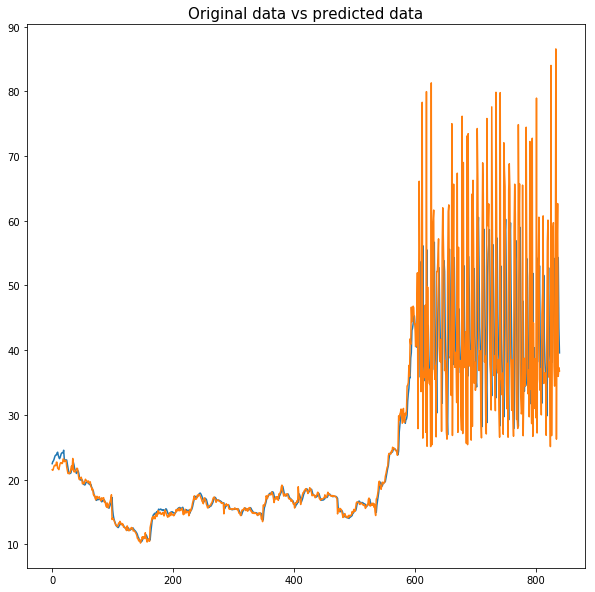

In [199]:
testY=testY.reshape(-1,1)
plt.figure(figsize=(10, 10))
plt.plot(testPredict)
plt.plot(testY)
plt.title('Original data vs predicted data', fontsize=15)
plt.show()

In [200]:
values_date=dataframe['Date'][len(train)+9:].values

In [201]:
predict_lowerdimen = testPredict.ravel()
actual_lowerdimen=testY.ravel()

In [202]:
train_final=[]
for i in range(len(values_date)-1):
    
    train_final.append([predict_lowerdimen[i],actual_lowerdimen[i],values_date[i]])
    
    i=i+1
    
    
    
    

In [203]:
train_final

[[22.464714, 21.52, '6/22/15'],
 [22.77365, 21.43, '6/23/15'],
 [22.891993, 21.69, '6/24/15'],
 [23.117464, 22.06, '6/25/15'],
 [23.445566, 22.22, '6/26/15'],
 [23.700434, 22.169999999999998, '6/29/15'],
 [23.791124, 22.140000000000004, '6/30/15'],
 [23.804771, 22.699999999999996, '7/1/15'],
 [24.11202, 22.67, '7/2/15'],
 [24.23556, 21.759999999999998, '7/6/15'],
 [23.770184, 21.68, '7/7/15'],
 [23.4749, 21.54, '7/8/15'],
 [23.238554, 21.980000000000004, '7/9/15'],
 [23.37847, 22.43, '7/10/15'],
 [23.71693, 22.62, '7/13/15'],
 [24.004303, 22.59, '7/14/15'],
 [24.13469, 22.47, '7/15/15'],
 [24.140493, 22.53, '7/16/15'],
 [24.176117, 23.17, '7/17/15'],
 [24.539646, 23.18, '7/20/15'],
 [23.189102, 22.76, '7/21/15'],
 [23.02976, 22.85, '7/22/15'],
 [22.996565, 22.98, '7/23/15'],
 [23.04722, 22.9, '7/24/15'],
 [23.017914, 21.94, '7/27/15'],
 [22.453045, 21.48, '7/28/15'],
 [21.908154, 20.95, '7/29/15'],
 [21.337387, 20.95, '7/30/15'],
 [21.06104, 20.910000000000004, '7/31/15'],
 [20.916252,

In [204]:
numpy.savetxt('/Users/cherry/datasetostk1.csv',train_final,delimiter=',',fmt='%s')
